<a href="https://colab.research.google.com/github/jljudge-gh/JupyterNotebooks-MathmaticalMethods-DataScience/blob/main/1_3_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1.3.1 QR Decomposition**

####Theorem 1.3.1 (Gram-Schmidt) <br>
Let $\textbf{a}_1,\cdots,\textbf{a}_m$ in $\mathbb{R}^n$ be linearly independent.
Then there exist an orthonormal basis $\textbf{q}_1,\cdots,\textbf{q}_m$ of $\text{span}(\textbf{a}_1,\cdots,\textbf{a}_m)$.

For a square matrix $A$ the QR Decomposition converts $A$ into the product of an orthogonal matrix $Q$ (i.e. $Q^TQ=I$)
 and an upper triangular matrix $R$. Hence:
 $$A=QR$$

where column $i$ of the $m\times m$ matrix $R$ contains the coefficients of the linear combination of $\textbf{q}_j$’s that produces $\textbf{a}_i$. $Q$ is a $\mathbb{R}^{n\times m}$ matrix with $Q^TQ = I_{m\times m}$.
By the proof of Gram-Schmidt, $\textbf{a}_i \in span(\textbf{q}_1, \cdots,\textbf{q}_i)$. So column $i$ of $R$ has
only zeros below the diagonal. Hence $R$ has a special structure: it is upper triangular.

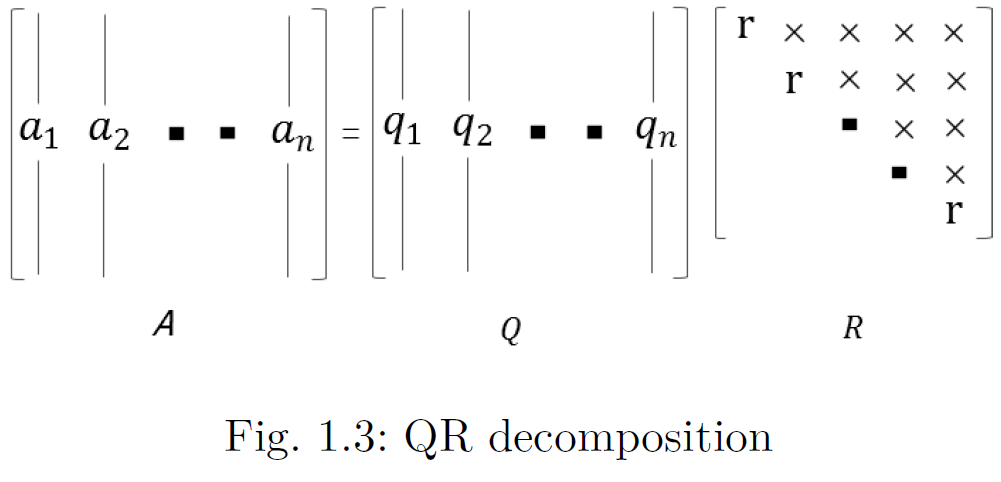

## Gram-Schmidt Orthogonization using Numpy <br>
The following is a Gram-Schmidt Orthogonization method using Numpy. The Gramm-Schmidt process only works for non-singular matrices, i.e. column and row vectors need to be linearly independent.

In [4]:
import numpy as np

def gram_schmidt(A):
    """Orthogonalize a set of vectors stored as the columns of matrix A."""
    # Get the number of vectors.
    n = A.shape[1]
    for j in range(n):
        # To orthogonalize the vector in column j with respect to the
        # previous vectors, subtract from it its projection onto
        # each of the previous vectors.
        for k in range(j):
            A[:, j] -= np.dot(A[:, k], A[:, j]) * A[:, k]
        A[:, j] = A[:, j] / np.linalg.norm(A[:, j])
    return A

if __name__ == '__main__':
    A = np.array([[1.0, 1.0, 0.0], [1.0, 3.0, 1.0], [2.0, -1.0, 1.0]])
    print(gram_schmidt(A))

[[ 0.40824829  0.20739034 -0.88900089]
 [ 0.40824829  0.82956136  0.38100038]
 [ 0.81649658 -0.51847585  0.25400025]]


## QR Decomposition  using Numpy <br>
Here, we will use the Python function built-in to `numpy` for obtaining the two matrices (Q & R) directly.
Use the *qr* function in `numpy.linalg` to decompose the matrix:
\begin{bmatrix}
0 & 2\\
2 & 3\\
\end{bmatrix}


In [2]:
import numpy as np
from numpy.linalg import qr

x = np.array([[0, 2], 
              [2, 3]])

q, r = qr(x)

print('Q:\n', q)
print('R: \n', r)

y = np.dot(q, r)
print('QR:\n', y)

Q:
 [[ 0. -1.]
 [-1.  0.]]
R: 
 [[-2. -3.]
 [ 0. -2.]]
QR:
 [[0. 2.]
 [2. 3.]]


# **1.3.2 Least-squares Problems**

####Theorem 1.3.2 (Normal Equations) <br>
Let $A \in \mathbb{R}^{n\times m}$ be an $n \times m$ matrix with
linearly independent columns and let $\textbf{b} \in \mathbb{R}^n$ be a vector. The solution to the least-squares problem 
$\min_{x\in\mathbb{R}^m}||A\textbf{x}−\textbf{b}||.$
satisfies
$A^TA\textbf{x}=A^T\textbf{b}$
which are known as the normal equations.

##Least Squares Regression in Python <br>
If we enumerate the estimation of the data at each data point, $x_i$, this gives us the following system of equations:

\begin{eqnarray*}
&&\hat{y}(x_1) = {\alpha}_1 f_1(x_1) + {\alpha}_2 f_2(x_1) + \cdots + {\alpha}_n f_n(x_1),\\
&&\hat{y}(x_2) = {\alpha}_1 f_1(x_2) + {\alpha}_2 f_2(x_2) + \cdots + {\alpha}_n f_n(x_2),\\
&&\qquad\qquad\qquad\qquad\qquad \cdots\\
&&\hat{y}(x_m) = {\alpha}_1 f_1(x_m) + {\alpha}_2 f_2(x_m) + \cdots + {\alpha}_n f_n(x_m).
\end{eqnarray*}

If the data was absolutely perfect (i.e., no noise), then the estimation function would go through all the data points, resulting in the following system of equations:

\begin{eqnarray*}
&&y_1 = {\alpha}_1 f_1(x_1) + {\alpha}_2 f_2(x_1) + \cdots + {\alpha}_n
f_n(x_1),\\
&&y_2 = {\alpha}_1 f_1(x_2) + {\alpha}_2 f_2(x_2) + \cdots + {\alpha}_n
f_n(x_2),\\
&&\qquad\qquad\qquad\qquad\cdots\\
&&y_m = {\alpha}_1 f_1(x_m) + {\alpha}_2 f_2(x_m) + \cdots + {\alpha}_n f_n(x_m).
\end{eqnarray*}

If we take $A$ to be as defined previously, this would result in the matrix equation $Y = A{\beta}.$

However, since the data is not perfect, there will not be an estimation function that can go through all the data points, and this system will have $\textit{no solution}$. Therefore, we need to use the least square regression that we derived in the previous two sections to get a solution.

### Direct Inverse Method <br>

In [52]:
import numpy as np
from scipy import optimize
import matplotlib.pyplot as plt

plt.style.use('seaborn-poster')

In [53]:
# generate x and y
x = np.linspace(0, 1, 101)
y = 1 + x + x * np.random.random(len(x))

# assemble matrix A
A = np.vstack([x, np.ones(len(x))]).T

# turn y into a column vector
y = y[:, np.newaxis]

In [54]:
# Direct least square regression
alpha = np.dot((np.dot(np.linalg.inv(np.dot(A.T,A)),A.T)),y)
print(alpha)

[[1.40150227]
 [1.02027244]]


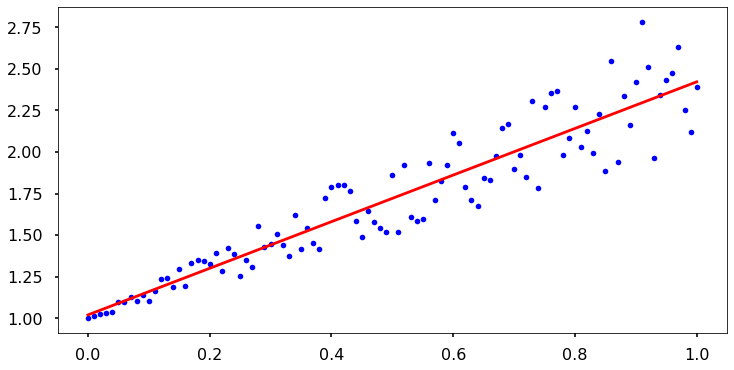

In [56]:
# plot the results
plt.figure(figsize=(12, 6))
plt.plot(x, y, 'b.')
plt.plot(x, alpha[0]*x + alpha[1], 'r')
plt.show()

In Python, there are many different ways to conduct the least square regression. For example, we can use packages as numpy, scipy, statsmodels, sklearn and so on to get a least square solution. Here we will use the above example and illustrate a few other ways to do it. 

#### Using the Moore–Penrose Inverse (pseudoinverse) <br>
We talked before that the $(A^T A)^{-1} A^T$ is called the pseudo-inverse, *therefore*, we could use the `pinv function` in `numpy` to directly calculate it.

In [12]:
pinv = np.linalg.pinv(A)
alpha = pinv.dot(y)
print(alpha)

[[1.4897751]
 [1.0218905]]


#### Using `numpy.linalg.lstsq` <br>
`numpy` already has implemented the least square methods so, we can just call the function to get a solution. The function will return more things than the solution itself, check the [documentation](https://numpy.org/doc/stable/reference/generated/numpy.linalg.lstsq.html) for more details.



In [13]:
alpha = np.linalg.lstsq(A, y, rcond=None)[0]
print(alpha)

[[1.4897751]
 [1.0218905]]


#### Using `optimize.curve_fit` from `scipy` <br>
This `scipy` function is actually very powerful, that it can fit not only linear functions, but many different function forms, such as non-linear function. Here we will show the linear example from above. Note that, using this function, we don’t need to turn y into a column vector.

In [14]:
# generate x and y
x = np.linspace(0, 1, 101)
y = 1 + x + x * np.random.random(len(x))

In [15]:
def func(x, a, b):
    y = a*x + b
    return y

alpha = optimize.curve_fit(func, xdata = x, ydata = y)[0]
print(alpha)

[1.45729878 1.01764481]


# **1.3.3 Linear Regression**

Given input data points $\left\{\left(\mathbf{x}_{i}, y_{i}\right)\right\}_{i=1}^{n}$ with each $\mathbf{x}_{i}=\left(x_{i 1}, \dots, x_{i d}\right)^{T}$, we seek an affine function to fit the data. The common approach involves finding coefficients $\beta_{j}$ 's that minimize the criterion
$$
\sum_{i=1}^{n}\left(y_{i}-\hat{y}_{i}\right)^{2}
$$
where
$$
\hat{y}_{i}=\beta_{0}+\sum_{j=1}^{d} \beta_{j} x_{i j}
$$
can be viewed as the predicted values of the linear model with coefficients $\beta_{j} .$ The minimization problem can be formulated in matrix form. Let
$$
\mathbf{y}=\left(\begin{array}{c}
y_{1} \\
y_{2} \\
\vdots \\
y_{n}
\end{array}\right), \quad A=\left(\begin{array}{cc}
1 & \mathbf{x}_{1}^{T} \\
1 & \mathbf{x}_{2}^{T} \\
\vdots & \vdots \\
1 & \mathbf{x}_{n}^{T}
\end{array}\right) \quad \text { and } \quad \beta=\left(\begin{array}{c}
\beta_{0} \\
\beta_{1} \\
\vdots \\
\beta_{d}
\end{array}\right)
$$
Then the problem is transformed to
$$
\min _{\beta}\|\mathbf{y}-A \beta\|^{2}
$$
This is exactly a least-squares problem we discuss in the last section.

## Building Linear Regression in Python <br>

### Setting up and generating data <br>

In [59]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

# Generate 'random' data
np.random.seed(0)
A = 2 * np.random.randn(100) 
res = np.random.randn(100)      
b = 3 + 0.2 * A + res                 

# Create pandas dataframe to store our A and b values
df = pd.DataFrame(
    {'A': A,
     'b': b}
)

# Show the first five rows of our dataframe
df.head()

,A,b
0,3.528105,5.588772
1,0.800314,1.812304
2,1.957476,2.121010
3,4.481786,4.865754
4,3.735116,2.573900


#### Calculating mean
To estimate $\textbf{b}$ using the ***Ordinary Linear Regression*** (OLS) method, we need to calculate mean of A (`mean_A`) and mean of B (`mean_B`), the covariance of $A$ and $\textbf{b}$ (`Abcov`), and the variance of $A$ (`Avar`) before we can determine the values for $\alpha$ (`alpha`) and $\beta$ (`beta`).

In [60]:
# Calculate the mean of A and b
mean_A = np.mean(A)
mean_b = np.mean(b)

# Calculate the terms needed for the numator and denominator of beta
df['Abcov'] = (df['A'] - mean_A) * (df['b'] - mean_b)
df['Avar'] = (df['A'] - mean_A)**2

# Calculate beta and alpha
beta = df['Abcov'].sum() / df['Avar'].sum()
alpha = mean_b - (beta * mean_A)
print(f'alpha = {alpha}')
print(f'beta = {beta}')

alpha = 3.0751530850525146
beta = 0.25734921677319056


#### Predicting model
Now that we have an estimate for `alpha` and `beta`, our model can be written as $Y_e = \alpha + \beta X$,​ and we can make predictions:

In [61]:
ypred = alpha + beta * A

#### Plotting model
Now we can plot our prediction `ypred` against the actual values of `a`, to get a better visual understanding of our model.

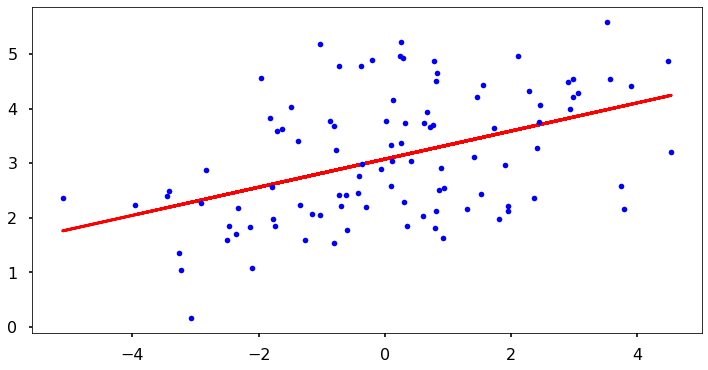

In [62]:
# Plot regression against actual data
plt.figure(figsize=(12, 6))
plt.plot(A, ypred, 'r')     # regression line
plt.plot(A, b, 'b.')   # scatter plot showing actual data

plt.show()

## Linear Regression with `scikit-learn` <br>

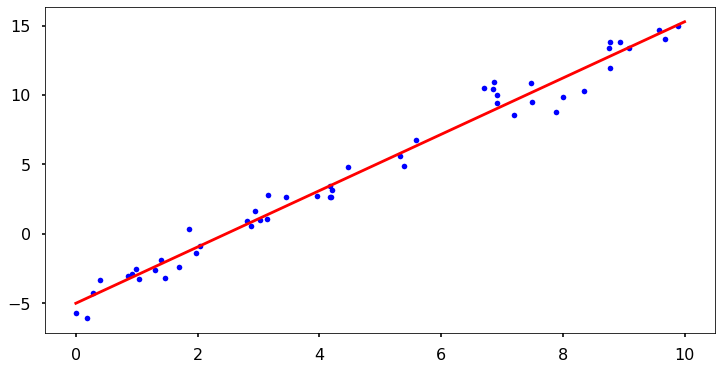

In [65]:
# Import the packages and classes needed for this example:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Create random data with numpy:
rnstate = np.random.RandomState(1)
x = 10 * rnstate.rand(50)
y = 2 * x - 5 + rnstate.randn(50)

# Create a linear regression model based the positioning of the data and Intercept, and predict a Best Fit:
model = LinearRegression(fit_intercept=True)
model.fit(x[:, np.newaxis], y)
xfit = np.linspace(0, 10, 1000)
yfit = model.predict(xfit[:, np.newaxis])

# Plot the estimated linear regression line with matplotlib:
plt.figure(figsize=(12, 6))
plt.plot(x, y, 'b.')
plt.plot(xfit, yfit, 'r')

plt.show()
